Realisé en partie avec Luc Sterkers

# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [10]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))
sonrot2 = np.array(Image.open('img/sonrot2.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [2]:
def computeFT(I):
    return fft2(I)
    """ Array -> Array[complex] """

def toVisualizeFT(If):
    return fftshift(If)
    """ Array[complex] -> Array[float] """

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return toVisualizeFT(1+ np.log(np.abs(If)))



2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

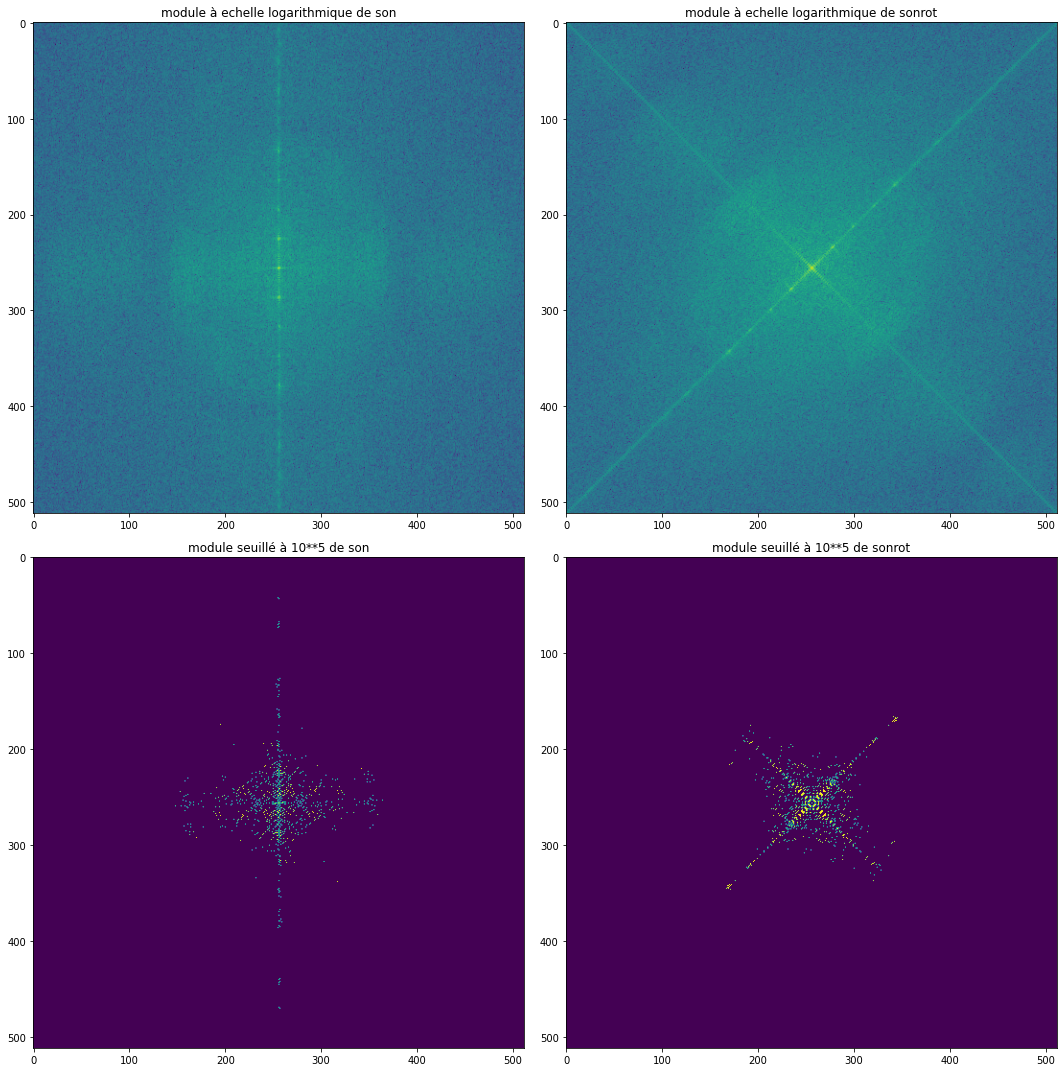

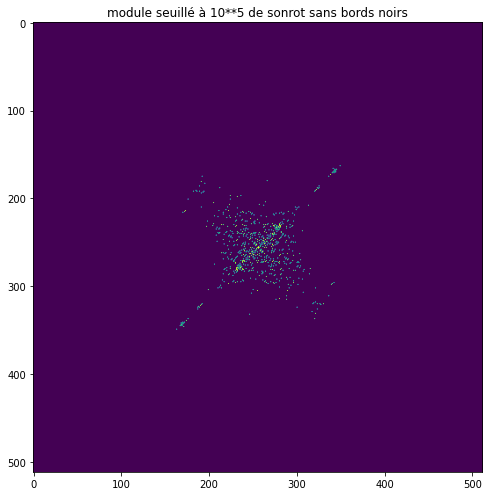

In [36]:
# your code below
import matplotlib.pyplot as plt

def thresholdImage(I,s):
    """ Array*int -> Array """
    return np.where(I<s,0,255)

fig, ax = plt.subplots(2,2,figsize=(15,15))

s1 = computeFT(son)
s2 = computeFT(sonrot)
s2b = computeFT(sonrot2)
m1 = toVisualizeLogFT(s1)
m2 = toVisualizeLogFT(s2)
m2b = toVisualizeLogFT(s2b)

ax[0][0].imshow(m1)
ax[0][1].imshow(m2)
ax[0][0].set_title("module à echelle logarithmique de son")
ax[0][1].set_title("module à echelle logarithmique de sonrot")


m1 = thresholdImage(toVisualizeFT(s1),10**5) #on voit mieux avec threshold 100
m2 = thresholdImage(toVisualizeFT(s2),10**5) #on voit mieux avec threshold 10000
m2b = thresholdImage(toVisualizeFT(s2b),10**5)

ax[1][0].imshow(m1)
ax[1][1].imshow(m2)
ax[1][0].set_title("module seuillé à 10**5 de son")
ax[1][1].set_title("module seuillé à 10**5 de sonrot")



plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(m2b)
ax.set_title("module seuillé à 10**5 de sonrot sans bords noirs")

plt.tight_layout()
plt.show()


3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

On voit bien que l'énergie des fréquences basses est bien plus importante que celle des fréquences hautes.  
Les fréquences basses de sonrot sont beaucoup plus fortes que celles de la première image, surement dû aux bords noirs.  
On voit aussi la rotation de la transformation de Fourier avec la rotation de l'image.  
On observe une légère modification du au bord noir de l'image en rotation, on perd cette modification si on rend l'image blanche dans le fond (dernière image). 

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [4]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha*I1+(1-alpha)*I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

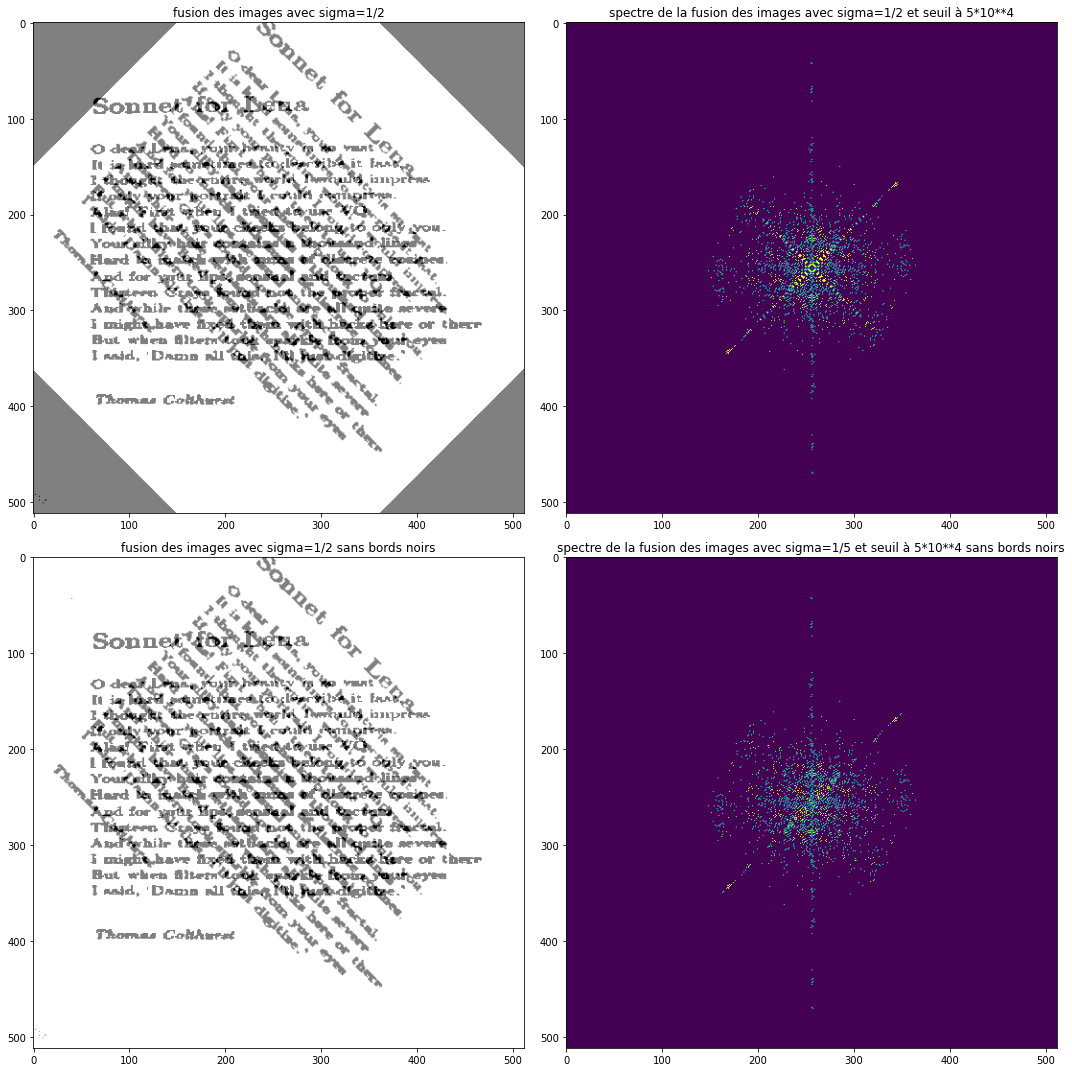

In [37]:
I12 = blend(son,sonrot,0.5)
s12 = computeFT(I12)
m12 = thresholdImage(toVisualizeFT(s12),5*10**4)

I12b = blend(son,sonrot2,0.5)
s12b = computeFT(I12b)
m12b = thresholdImage(toVisualizeFT(s12b),5*10**4)
fig, ax = plt.subplots(2,2,figsize=(15,15))

ax[0][0].imshow(I12,cmap="gray")
ax[0][1].imshow(m12)

ax[1][0].imshow(I12b,cmap="gray")
ax[1][1].imshow(m12b)

ax[0][0].set_title("fusion des images avec sigma=1/2")
ax[0][1].set_title("spectre de la fusion des images avec sigma=1/2 et seuil à 5*10**4")

ax[1][0].set_title("fusion des images avec sigma=1/2 sans bords noirs")
ax[1][1].set_title("spectre de la fusion des images avec sigma=1/5 et seuil à 5*10**4 sans bords noirs")

plt.tight_layout()
plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

On observe bien ici la forme de croix (ou la diagonale dans le cas sans bords noirs) présente dans l'image en rotation en plus du spectre de l'image de base.  
Ici on fait additionne les images avec un coefficient 0.5 pour chaqu'un, on perd donc de l'intensité des deux images fusionnés, il faut donc un peu reduire le seuil pour mieux voir.  
Ici on voit bien que l'addition de deux signaux correspond à l'addition de leurs spectres de fréquences :  
**x(t,u) + 𝛼y(t,u) <=> X(f,g) + 𝛼Y(f,g)**  
𝛼 a le role de régulateur de la proportion des deux images dans l'image resultante.   
Il permet aussi d'éviter de saturer l'image en additionnant directement les deux images.


7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

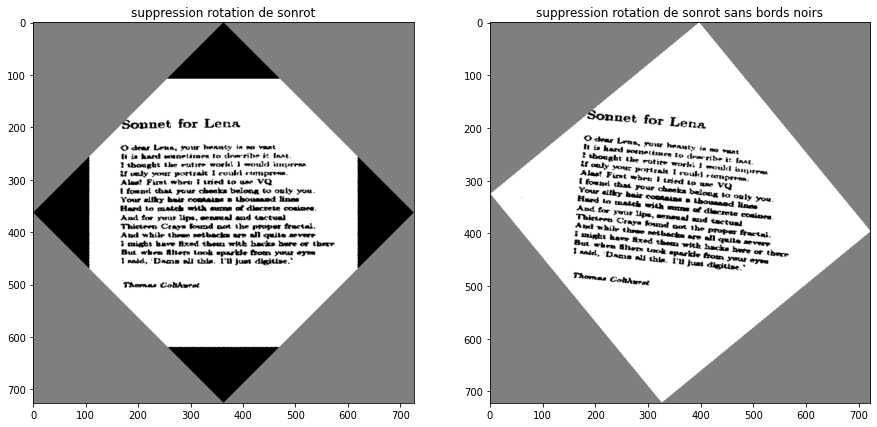

In [39]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))


####### your code below
def rectifyOrientation(I):
    s = computeFT(I)
    m = thresholdImage(toVisualizeFT(s),3*10**5)
    rot = mainOrientation(m)
    return rotateImage(I,-rot[1])

fig, ax = plt.subplots(1,2,figsize=(15,15))

rotateI = rectifyOrientation(sonrot)
rotateI2 = rectifyOrientation(sonrot2)
ax[0].imshow(rotateI,cmap="gray")
ax[0].set_title("suppression rotation de sonrot")
ax[1].imshow(rotateI2,cmap="gray")
ax[1].set_title("suppression rotation de sonrot sans bords noirs")
plt.show()


8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

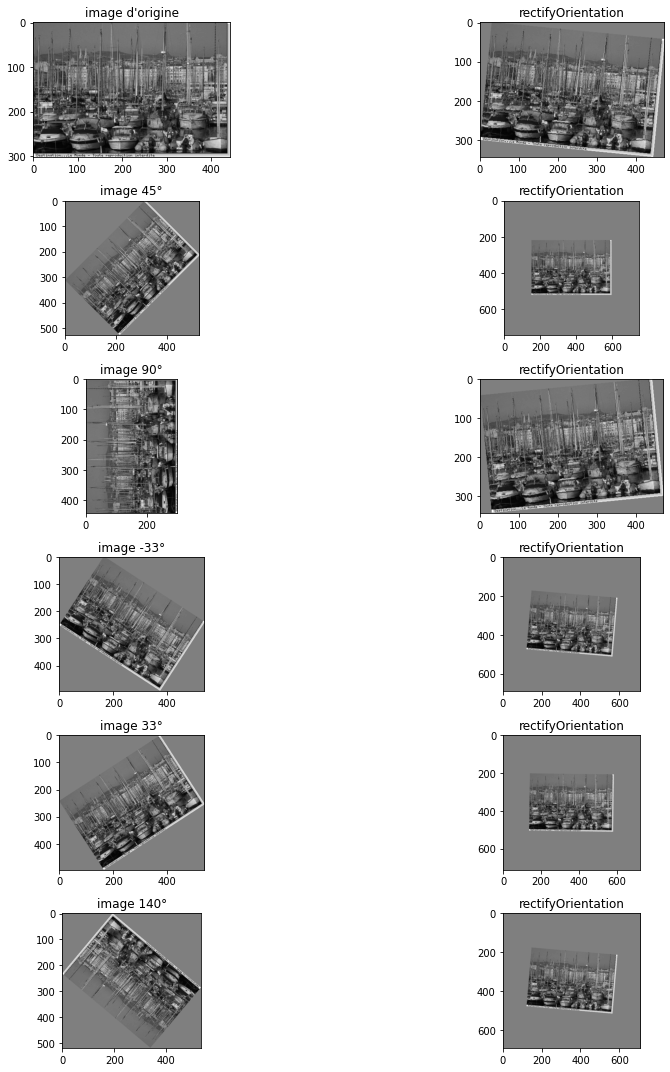

In [7]:
sinrot = np.array(Image.open('img/port.jpg'))
fig, ax = plt.subplots(6,2,figsize=(15,15))

ax[0][0].imshow(sinrot,cmap="gray")
ax[0][1].imshow(rectifyOrientation(sinrot),cmap="gray")
ax[0][0].set_title("image d'origine")
ax[0][1].set_title("rectifyOrientation")

ax[1][0].imshow(rotateImage(sinrot,45),cmap="gray")
ax[1][1].imshow(rectifyOrientation(rotateImage(sinrot,45)),cmap="gray")
ax[1][0].set_title("image 45°")
ax[1][1].set_title("rectifyOrientation")


ax[2][0].imshow(rotateImage(sinrot,90),cmap="gray")
ax[2][1].imshow(rectifyOrientation(rotateImage(sinrot,90)),cmap="gray")
ax[2][0].set_title("image 90°")
ax[2][1].set_title("rectifyOrientation")

ax[3][0].imshow(rotateImage(sinrot,-33),cmap="gray")
ax[3][1].imshow(rectifyOrientation(rotateImage(sinrot,-33)),cmap="gray")
ax[3][0].set_title("image -33°")
ax[3][1].set_title("rectifyOrientation")

ax[4][0].imshow(rotateImage(sinrot,33),cmap="gray")
ax[4][1].imshow(rectifyOrientation(rotateImage(sinrot,33)),cmap="gray")
ax[4][0].set_title("image 33°")
ax[4][1].set_title("rectifyOrientation")

ax[5][0].imshow(rotateImage(sinrot,140),cmap="gray")
ax[5][1].imshow(rectifyOrientation(rotateImage(sinrot,-33)),cmap="gray")
ax[5][0].set_title("image 140°")
ax[5][1].set_title("rectifyOrientation");
plt.tight_layout()
plt.show()